# **Superstore Sales Dataset EDA**

Objectives:

The objective of this analysis is to explore the data by Time Series Analysis and to know which the factor that impacted on sales the most?

Questions:


1-What is the 15 top cites?

2-What is the 15 top states?

3-To What extend Shipping Mode impacted the
sales?

4-To What extend Segment impacted the sales?

5-To What extend Category impacted the sales?

6-To What extend Sub-Category impacted the sales?

7-What is the most frequent Category?

8-What is the Region has the Max sales?

9-What is the Segment has the Max sales?

10-What is the relationship between segment and category with sales?

11-What is the relationship between segment and city with sales?

12- what is the difference between order time and ship mode and how influences on sales?




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

df=pd.read_csv("/content/drive/MyDrive/sales data.csv",encoding="utf-8")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# getting a random sample
df.sample(8)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
8884,8885,CA-2015-107398,25/08/2015,30/08/2015,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Columbus,Ohio,43229.0,East,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,6.528
989,990,CA-2018-167899,21/05/2018,26/05/2018,Standard Class,JG-15805,John Grady,Corporate,United States,Auburn,New York,13021.0,East,OFF-AR-10001988,Office Supplies,Art,Bulldog Table or Wall-Mount Pencil Sharpener,17.970
7545,7546,CA-2015-103492,10/10/2015,15/10/2015,Standard Class,CM-12715,Craig Molinari,Corporate,United States,Huntsville,Texas,77340.0,Central,TEC-PH-10001128,Technology,Phones,Motorola Droid Maxx,719.952
2482,2483,CA-2018-126067,28/08/2018,03/09/2018,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,Seattle,Washington,98105.0,West,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,35.168
8937,8938,CA-2016-134117,17/12/2016,19/12/2016,Second Class,PG-18895,Paul Gonzalez,Consumer,United States,Los Angeles,California,90008.0,West,TEC-PH-10004908,Technology,Phones,Panasonic KX TS3282W Corded phone,135.984
9380,9381,CA-2015-154158,23/12/2015,27/12/2015,Second Class,CC-12670,Craig Carreira,Consumer,United States,Tampa,Florida,33614.0,South,FUR-CH-10004698,Furniture,Chairs,"Padded Folding Chairs, Black, 4/Carton",64.784
1453,1454,CA-2017-133711,26/11/2017,29/11/2017,First Class,MC-17425,Mark Cousins,Corporate,United States,Mobile,Alabama,36608.0,South,OFF-BI-10004352,Office Supplies,Binders,Wilson Jones DublLock D-Ring Binders,33.750
3821,3822,CA-2018-141873,09/10/2018,14/10/2018,Standard Class,HG-14845,Harry Greene,Consumer,United States,New York City,New York,10024.0,East,OFF-PA-10000069,Office Supplies,Paper,"TOPS 4 x 6 Fluorescent Color Memo Sheets, 500 ...",18.980


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
#to know the duplicates
df.duplicated().sum() #no duplicates


0

In [8]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
#there is missing values in postal code so i will repalce these missing values with codes in america which equal 05401
df['Postal Code'].fillna (5401,inplace=True)

In [10]:
#to ensure that the data was minpulated
df.isnull().sum().sum()


0

In [11]:
#convert Order Date $ Ship Date from booleans to no. in order to validate the data
df['Order Date']=pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

In [12]:
#to ensure that time converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [13]:
df.describe()

,Row ID,Postal Code,Sales,Year,Month
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,55217.343265,230.769059,2016.724184,7.818469
std,2829.160653,32066.750532,626.651875,1.123984,3.281905
min,1.000000,1040.000000,0.444000,2015.000000,1.000000
25%,2450.750000,23223.000000,17.248000,2016.000000,5.000000
50%,4900.500000,57551.000000,54.490000,2017.000000,9.000000
75%,7350.250000,90008.000000,210.605000,2018.000000,11.000000
max,9800.000000,99301.000000,22638.480000,2018.000000,12.000000


#Data Analytics and Visualization

what is the top 15 cities with sales?

In [14]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month'],
      dtype='object')


In [15]:
top_cities= df.groupby('City').sum().sort_values('Sales',ascending=False).head(15)
top_cities['Sales']= top_cities['Sales'].round(2) #t to get the number of decimal needed
top_cities=top_cities.reset_index() # allows you reset the index back to the default 0, 1, 2 etc indexes.
print(top_cities)


             City   Row ID  Postal Code      Sales     Year  Month
0   New York City  4213827    8928358.0  252462.55  1796969   7229
1     Los Angeles  3596521   65542378.0  173420.18  1468120   5594
2         Seattle  2179382   41793552.0  116106.32   859202   3299
3   San Francisco  2363834   47057201.0  109041.12  1008358   3923
4    Philadelphia  2481726   10179682.0  108841.75  1072896   4133
5         Houston  1987227   28821264.0   63956.14   754212   2850
6         Chicago  1584195   18673450.0   47820.13   621165   2309
7       San Diego   827518   15650880.0   47521.03   342781   1413
8    Jacksonville   599775    3843200.0   44713.18   252101    901
9         Detroit   567542    5545741.0   42446.94   231923    976
10    Springfield   799551    8925351.0   41827.81   324691   1273
11       Columbus  1066839    8930083.0   38662.56   445706   1738
12         Newark   464322    2630452.0   28448.05   185525    665
13       Columbia   439183    2703350.0   25283.32   163340   

<ipython-input-15-17cb0eab3d9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_cities= df.groupby('City').sum().sort_values('Sales',ascending=False).head(15)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Seattle'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Philadelphia'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Jacksonville'),
  Text(9, 0, 'Detroit'),
  Text(10, 0, 'Springfield'),
  Text(11, 0, 'Columbus'),
  Text(12, 0, 'Newark'),
  Text(13, 0, 'Columbia'),
  Text(14, 0, 'Jackson')])

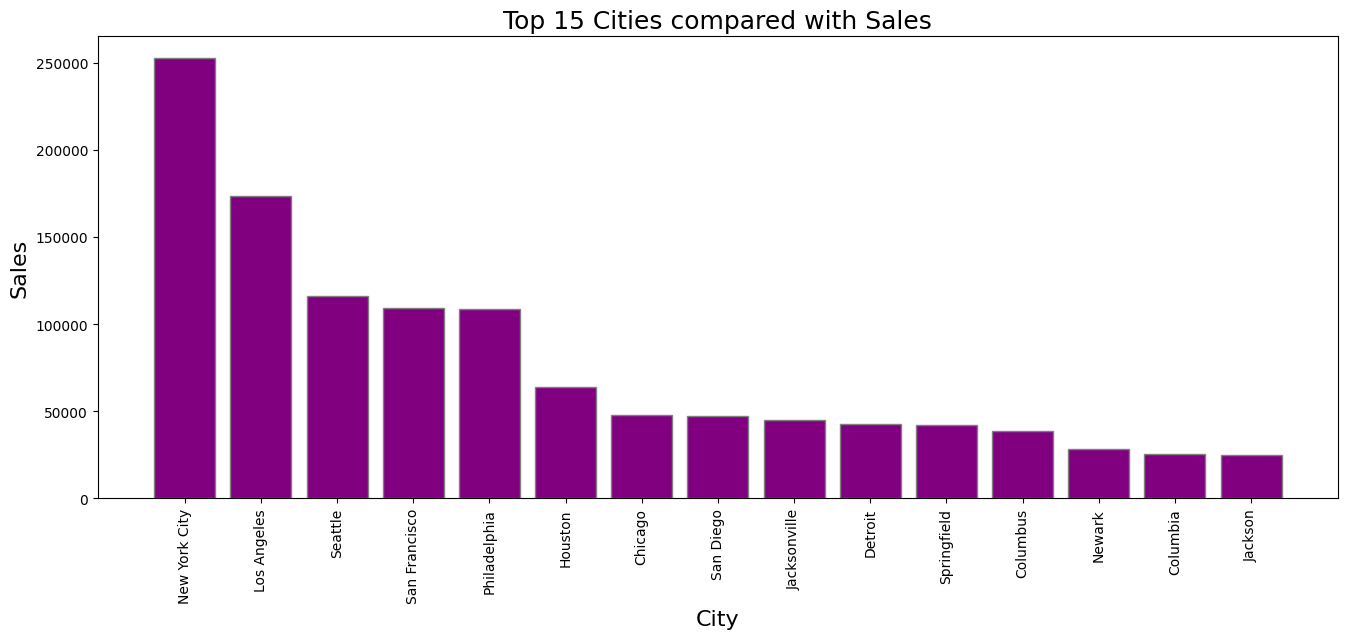

In [16]:
plt.figure(figsize=(16,6))
plt.bar(top_cities["City"],top_cities["Sales"], color="purple",edgecolor="gray")
plt.title("Top 15 Cities compared with Sales",fontsize=18)
plt.xlabel("City",fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.xticks(rotation='vertical')

what is the top 15 states with sales?

In [17]:
top_states= df.groupby('State').sum().sort_values('Sales',ascending=False).head(15)
top_states['Sales']= top_states['Sales'].round(2) #t to get the number of decimal needed
top_states=top_states.reset_index() # allows you reset the index back to the default 0, 1, 2 etc indexes.
print(top_states)

             State   Row ID  Postal Code      Sales     Year  Month
0       California  9592568  179328411.0  446306.46  3924544  15417
1         New York  5145327   11511840.0  306361.15  2212371   8846
2            Texas  4966826   74825178.0  168572.53  1962233   7387
3       Washington  2564655   49465481.0  135206.85  1016522   3981
4     Pennsylvania  2718795   11094945.0  116276.65  1173729   4463
5          Florida  1859919   12304453.0   88436.53   752219   2817
6         Illinois  2482676   29322411.0   79236.52   974085   3624
7         Michigan  1180200   12257093.0   76136.07   510203   2066
8             Ohio  2207758   19910187.0   75130.35   915617   3592
9         Virginia  1218137    5124335.0   70636.72   451661   1541
10  North Carolina  1199539    6938575.0   55165.96   498149   1937
11         Indiana   590233    6333690.0   48718.40   272275   1135
12         Georgia   814048    5471827.0   48219.11   356979   1166
13        Kentucky   679048    5643819.0   36458

<ipython-input-17-ea0e7bd6f0c4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_states= df.groupby('State').sum().sort_values('Sales',ascending=False).head(15)


In [18]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month'],
      dtype='object')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Washington'),
  Text(4, 0, 'Pennsylvania'),
  Text(5, 0, 'Florida'),
  Text(6, 0, 'Illinois'),
  Text(7, 0, 'Michigan'),
  Text(8, 0, 'Ohio'),
  Text(9, 0, 'Virginia'),
  Text(10, 0, 'North Carolina'),
  Text(11, 0, 'Indiana'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Kentucky'),
  Text(14, 0, 'Arizona')])

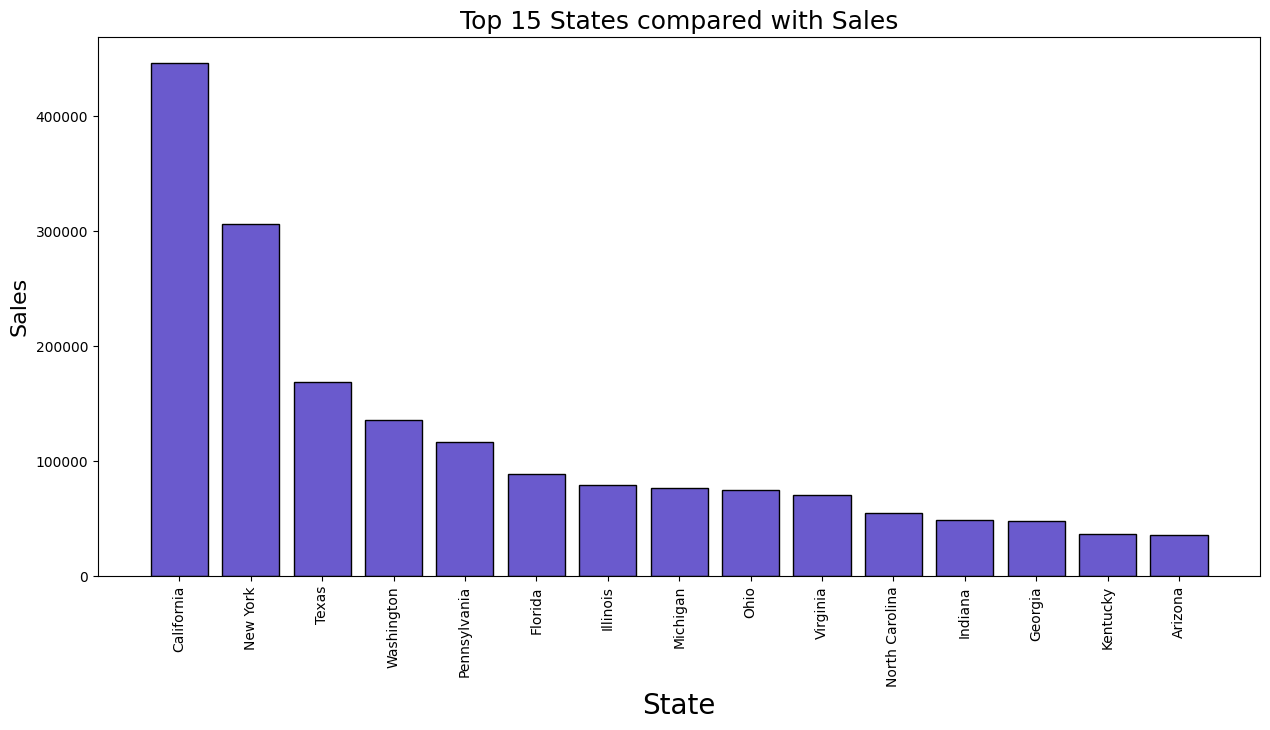

In [19]:
plt.figure(figsize=(15,7))
plt.bar(top_states['State'],top_states["Sales"],color="slateblue",edgecolor="black")
plt.title("Top 15 States compared with Sales",fontsize=18)
plt.xlabel('State',fontsize=20)
plt.ylabel("Sales",fontsize=16)
plt.xticks(rotation='vertical')

Notes:
the variables [segment,category,sub-category,shipping mode] are categorical variables


Shipping Mode

In [20]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

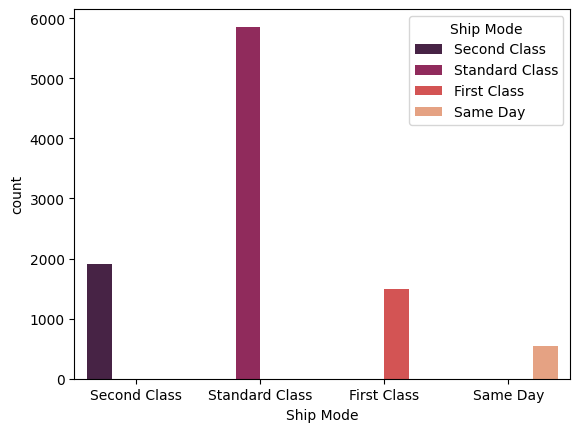

In [21]:
ax = sns.countplot(data=df, x='Ship Mode', hue='Ship Mode', palette='rocket')


Standard class the most common order

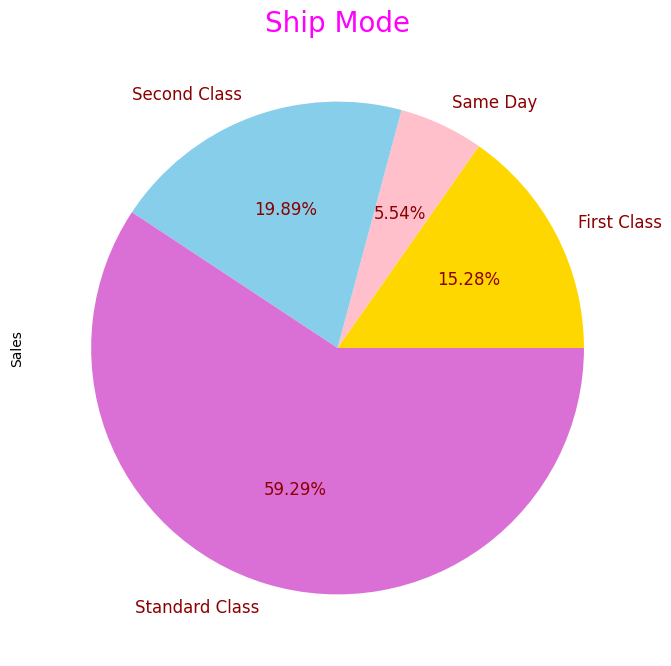

In [22]:
df.groupby('Ship Mode').Sales.sum().plot(kind = "pie",
 subplots=True,
autopct = "%.2f%%",
 colors = ["gold", "pink", "skyblue","orchid"],
 figsize = (10,8),
 textprops = {"color" : "darkred",
 "size" : "12"})
plt.title("Ship Mode", size = 20, color = "magenta", fontweight = 5);


the results revealed that: the results revealed that: the major selling class in ship mode is standard [59.29%], then comes into the second degree is the second class [19.89%]


Segment

In [23]:
df['Segment'].value_counts()


Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

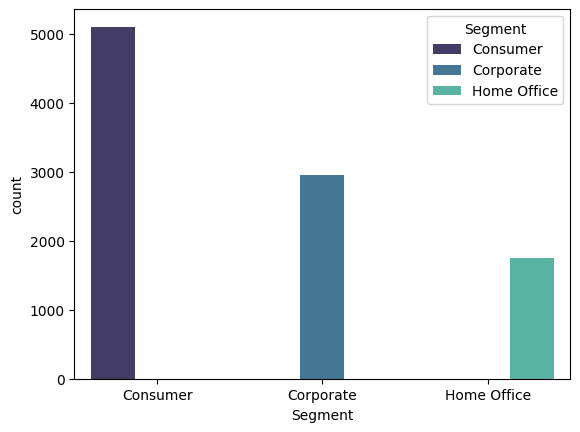

In [24]:
ax = sns.countplot(data=df, x='Segment', hue='Segment', palette='mako') #consumer the most common order

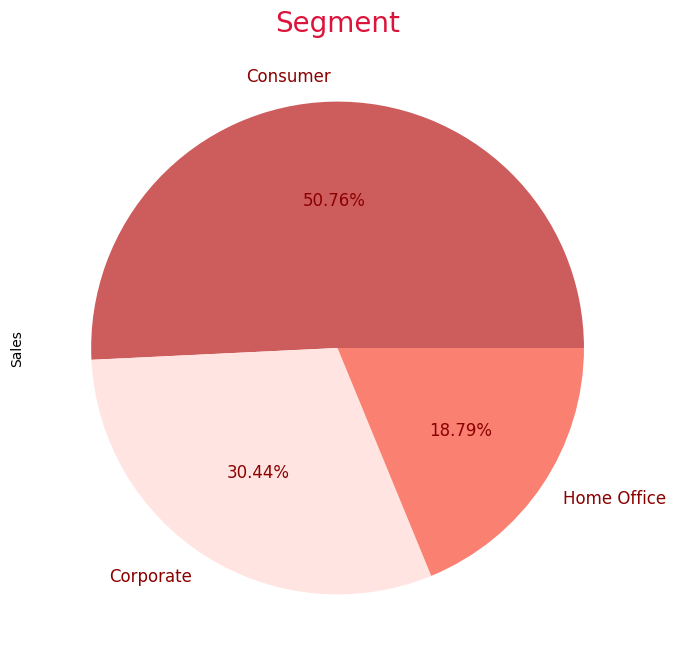

In [25]:
df.groupby('Segment').Sales.sum().plot(kind = "pie",
 subplots=True,
autopct = "%.2f%%",
 colors = ["indianred", "mistyrose", "salmon"],
 figsize = (10,8),
 textprops = {"color" : "darkred",
 "size" : "12"})
plt.title('Segment', size = 20, color = "crimson", fontweight = 5);

the results revealed that: the results revealed that: Most orders was from consumers with a precentage [50.76%] then in the second class is corporate with a precentage [30.44%]

In [26]:
df['Category'].value_counts()


Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

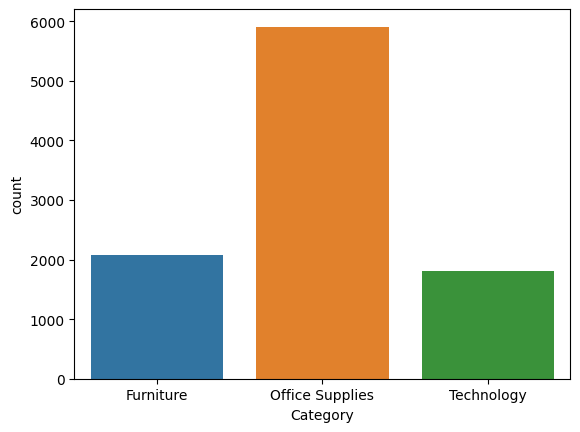

In [27]:
sns.countplot(x='Category',data=df) # Most orders was from office suppliers

In [28]:
df_category = df.groupby("Category")["Sales"].sum()
display(df_category)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

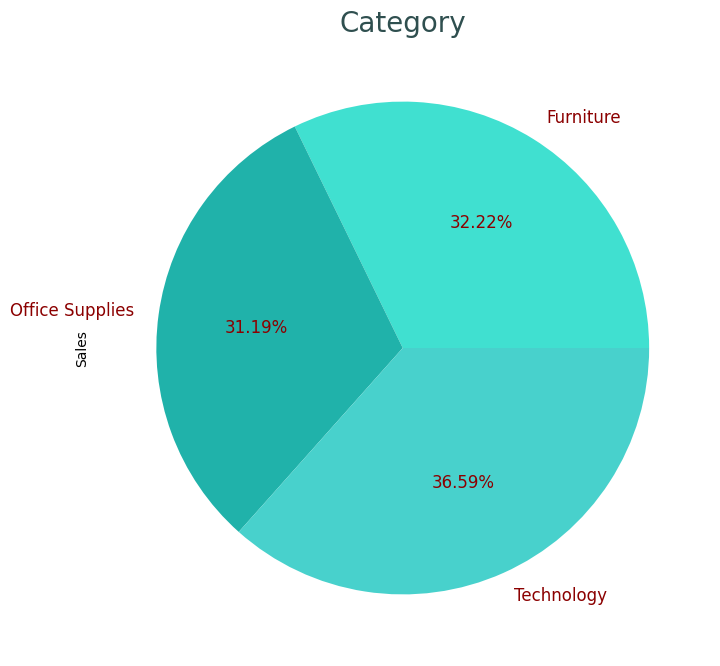

In [29]:
df.groupby('Category').Sales.sum().plot(kind = "pie",
 subplots=True,
autopct = "%.2f%%",
 colors = ["turquoise", "lightseagreen", "mediumturquoise"],
 figsize = (10,8),
 textprops = {"color" : "darkred",
 "size" : "12"})
plt.title('Category', size = 20, color = "darkslategray", fontweight = 5);

as a consequence office suppliers is the most selling

In [30]:
df_category_year = df.groupby(["Year", "Category"])["Sales"].sum().reset_index()
display(df_category_year)


,Year,Category,Sales
0,2015,Furniture,156477.8811
1,2015,Office Supplies,149512.8200
2,2015,Technology,173865.5070
3,2016,Furniture,164053.8674
4,2016,Office Supplies,133124.4070
5,2016,Technology,162257.7310
6,2017,Furniture,195813.0400
7,2017,Office Supplies,182417.5660
8,2017,Technology,221961.9440
9,2018,Furniture,212313.7872


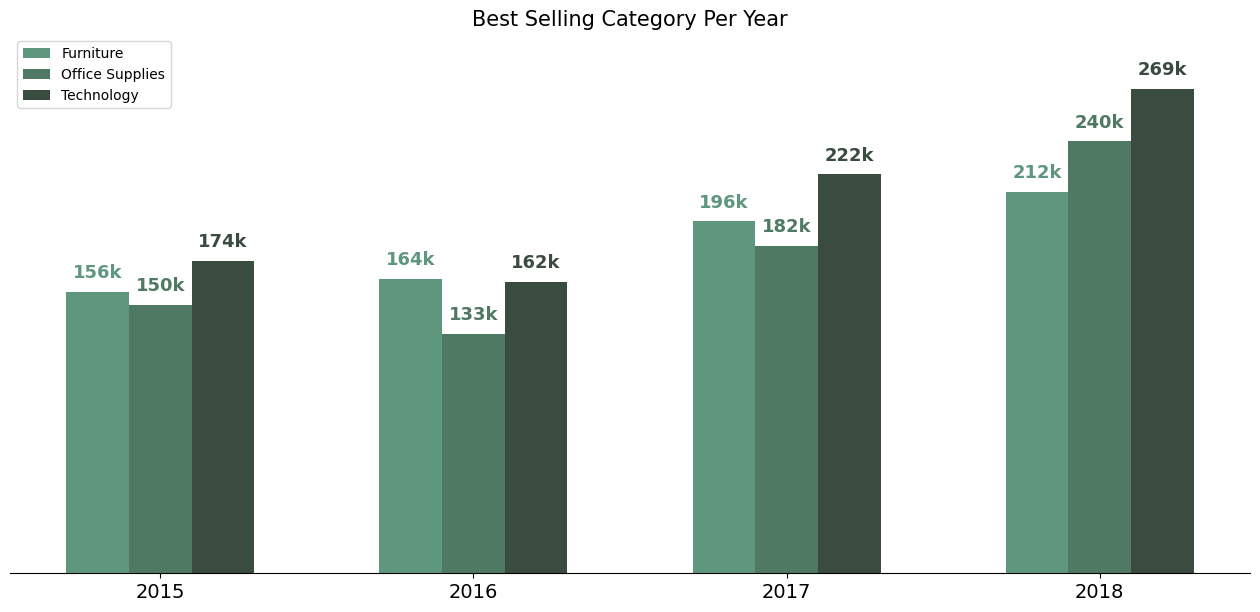

In [31]:

fig, ax = plt.subplots(figsize=(16, 7))
w=0.2
ax.bar(df_category_year[df_category_year.Category == "Furniture"].Year.values-w,
 df_category_year[df_category_year.Category == "Furniture"].Sales.values, width=w,
 label="Furniture", color='#5f967e')
ax.bar(df_category_year[df_category_year.Category == "Office Supplies"].Year.values,
 df_category_year[df_category_year.Category == "Office Supplies"].Sales.values, width=w,
 label="Office Supplies", color='#507963')
ax.bar(df_category_year[df_category_year.Category == "Technology"].Year.values+w,
 df_category_year[df_category_year.Category == "Technology"].Sales.values, width=w,
 label="Technology", color='#3a4c40')
for i in range(0, 4):
 ax.annotate(
 "{:,.0f}k".format(df_category_year[df_category_year.Category == "Furniture"].Sales.values[i] / 1000),
 (i+2015-w, df_category_year[df_category_year.Category == "Furniture"].Sales.values[i]),
 ha='center',
 xytext=(0, 10),
 textcoords="offset points",
 color='#5f967e',
 fontsize=13,
 fontweight='bold'
 )
 ax.annotate(
 "{:,.0f}k".format(df_category_year[df_category_year.Category == "Office Supplies"].Sales.values[i] / 1000),
 (i+2015, df_category_year[df_category_year.Category == "Office Supplies"].Sales.values[i]),
 ha='center',
 xytext=(0, 10),
 textcoords="offset points",
 color='#507963',
 fontsize=13,
 fontweight='bold'
 )
 ax.annotate(
 "{:,.0f}k".format(df_category_year[df_category_year.Category == "Technology"].Sales.values[i] / 1000),
 (i+2015+w, df_category_year[df_category_year.Category == "Technology"].Sales.values[i]),
 ha='center',
 xytext=(0, 10),
 textcoords="offset points",
 color='#3a4c40',
 fontsize=13,
 fontweight='bold'
 )
ax.set_title("Best Selling Category Per Year", fontsize=15)
ax.xaxis.set_ticks(np.arange(2015, 2019))
ax.tick_params(axis='x', labelsize=14)
ax.yaxis.set_visible(False)
ax.set_yticks(np.array([0, 300000]))
ax.spines[["top", "left", "right"]].set_visible(False)
ax.legend()
plt.show()


The Relationship between category, segment and sales

In [32]:

df_segment_category = df.groupby(["Segment", "Category"])["Sales"].sum().reset_index()
display(df_segment_category)



,Segment,Category,Sales
0,Consumer,Furniture,387696.2580
1,Consumer,Office Supplies,359352.6080
2,Consumer,Technology,401011.6650
3,Corporate,Furniture,220321.7018
4,Corporate,Office Supplies,224130.5360
5,Corporate,Technology,244041.8370
6,Home Office,Furniture,120640.6159
7,Home Office,Office Supplies,121939.1900
8,Home Office,Technology,182402.3710


<ipython-input-33-230791fa1584>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = df["Category"], y = df["Sales"], hue = df["Segment"], ci = None, estimator=np.sum,palette="pastel")


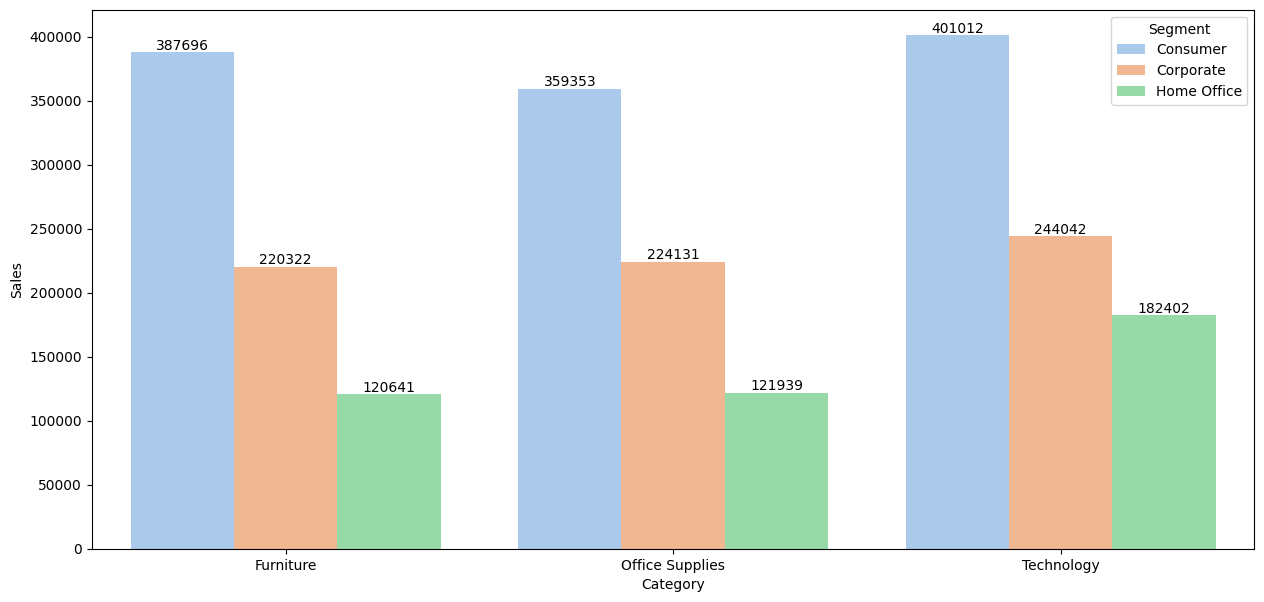

In [33]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = df["Category"], y = df["Sales"], hue = df["Segment"], ci = None, estimator=np.sum,palette="pastel")
for i in ax.containers :
 plt.bar_label(i);

In [34]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

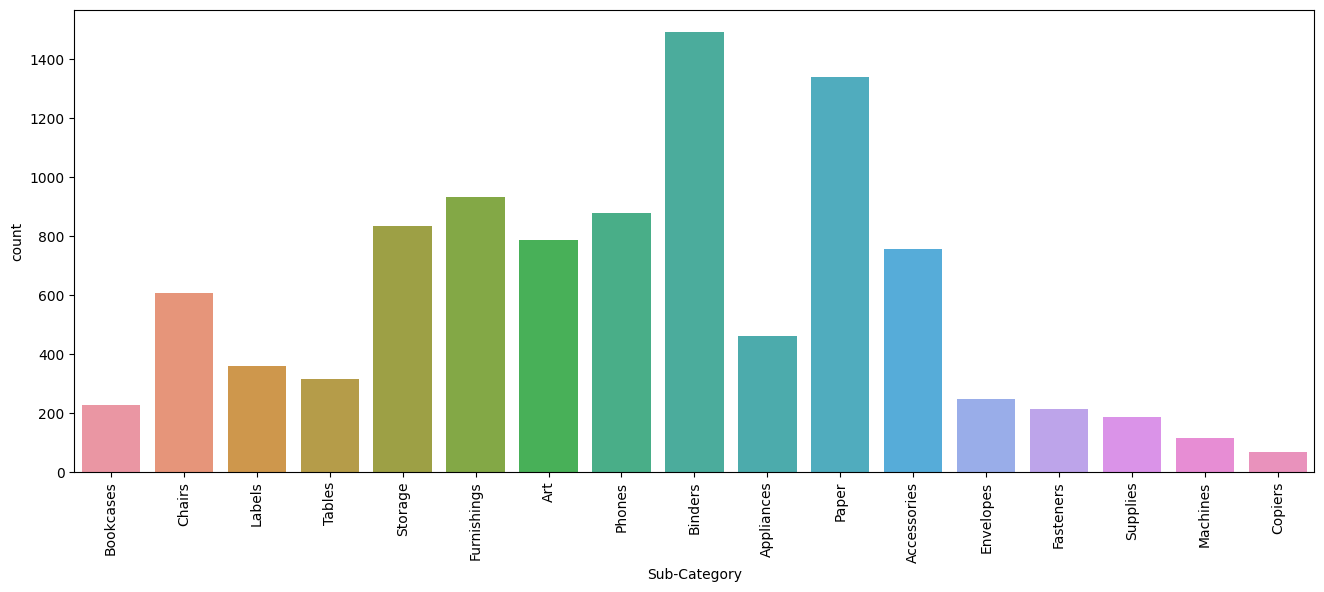

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(x='Sub-Category',data=df)
# to sho the names as vertical
plt.xticks(rotation='vertical') #binders has the most orders

binders has the most orders

In [36]:
subcategory = df.groupby("Sub-Category")["Sales"].sum()
display(subcategory)

Sub-Category
Accessories    164186.7000
Appliances     104618.4030
Art             26705.4100
Binders        200028.7850
Bookcases      113813.1987
Chairs         322822.7310
Copiers        146248.0940
Envelopes       16128.0460
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76828.3040
Phones         327782.4480
Storage        219343.3920
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64

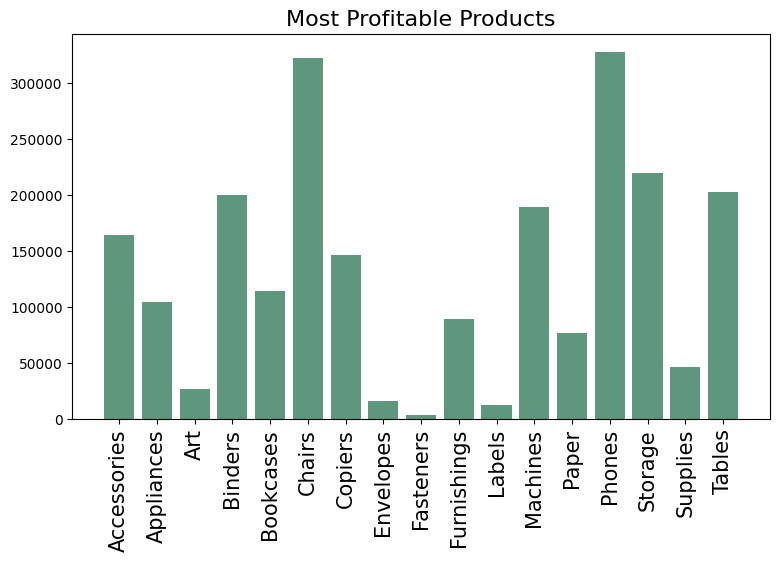

In [37]:

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(subcategory.index, subcategory.values, color='#5f967e')
ax.set_title("Most Profitable Products", fontsize=16)
ax.tick_params(axis='x', labelsize=15)
plt.xticks(rotation='vertical')
plt.show()


phones has the most sales

In [38]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month'],
      dtype='object')


Regions

In [39]:
regions = df.groupby('Region')["Sales"].sum()
display(regions)

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Region')

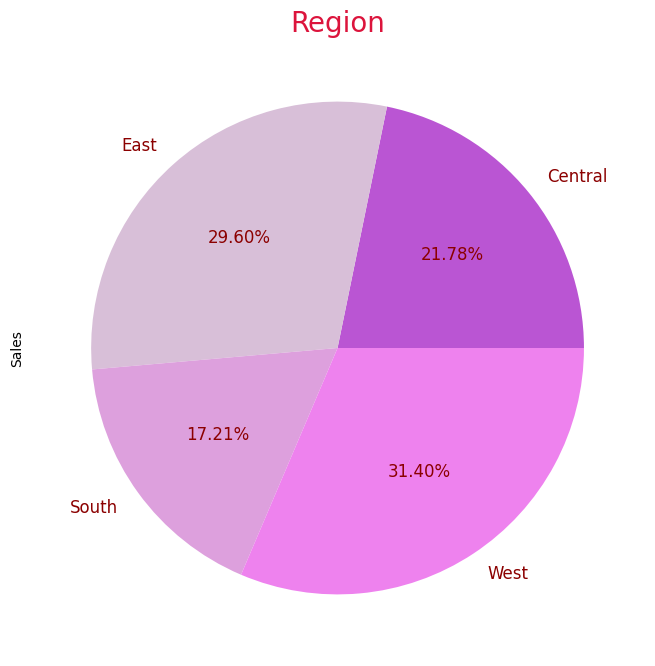

In [43]:
df.groupby('Region').Sales.sum().plot(kind = "pie",
 subplots=True,
autopct = "%.2f%%",
 colors = ["mediumorchid", "thistle", "plum","violet"],
 figsize = (10,8),
 textprops = {"color" : "darkred",
 "size" : "12"})
plt.title('Region', size = 20, color = "crimson", fontweight = 5)

In [44]:
df_regions_category = df.groupby(["Region", "Category"])["Sales"].sum().reset_index()
display(df_regions_category)

,Region,Category,Sales
0,Central,Furniture,160317.4622
1,Central,Office Supplies,163590.2430
2,Central,Technology,168739.2080
3,East,Furniture,206461.3880
4,East,Office Supplies,199940.8110
5,East,Technology,263116.5270
6,South,Furniture,116531.4800
7,South,Office Supplies,124424.7710
8,South,Technology,148195.2080
9,West,Furniture,245348.2455


<ipython-input-45-a45187478aa6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = df["Category"], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette="Set3")


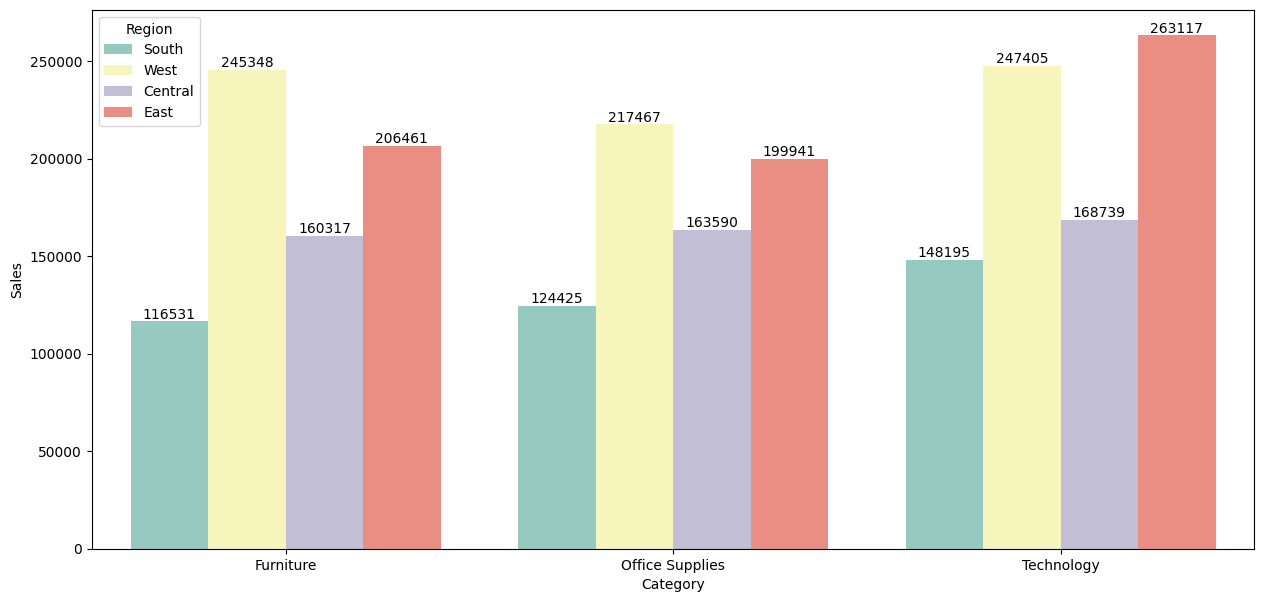

In [45]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = df["Category"], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette="Set3")
for i in ax.containers :
 plt.bar_label(i);


In [46]:
df_regions_segment = df.groupby(['Segment', 'Region'])["Sales"].sum().reset_index()
display(df_regions_segment)

,Segment,Region,Sales
0,Consumer,Central,250210.5220
1,Consumer,East,347906.6050
2,Consumer,South,194702.2130
3,Consumer,West,355241.1910
4,Corporate,Central,152031.4968
5,Corporate,East,195897.4250
6,Corporate,South,120546.8745
7,Corporate,West,220018.2785
8,Home Office,Central,90404.8944
9,Home Office,East,125714.6960


<ipython-input-47-3930831568ef>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = df['Segment'], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette='Paired_r')


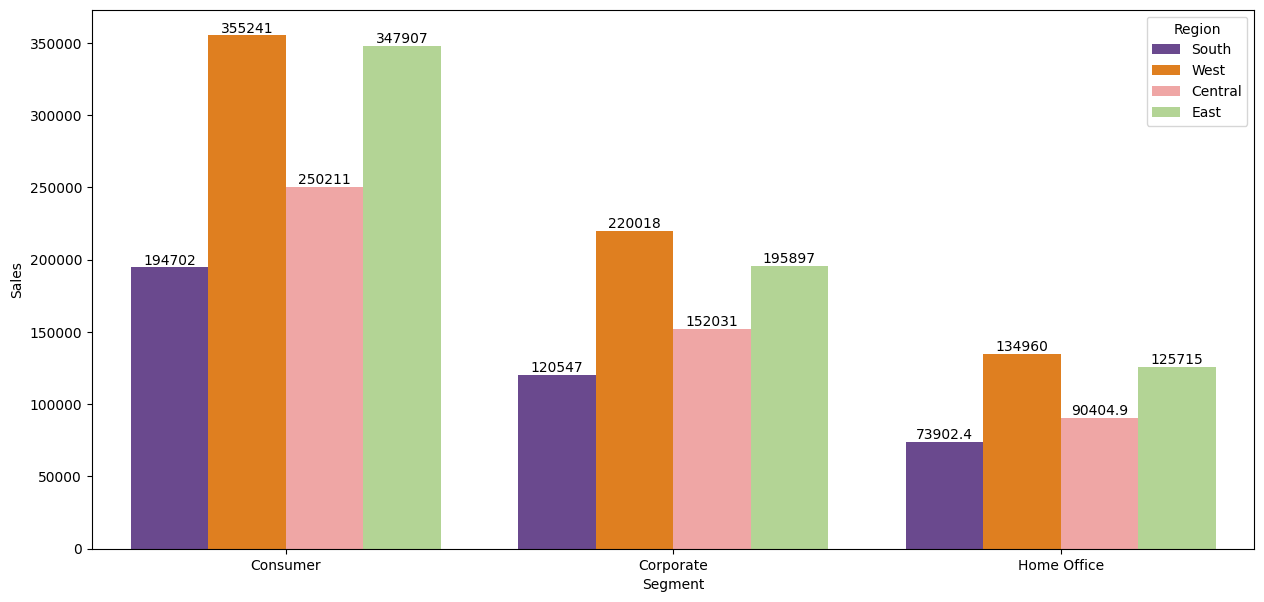

In [47]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = df['Segment'], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette='Paired_r')
for i in ax.containers :
 plt.bar_label(i);


Shipping date and sales

In [48]:
df['day'] = df['Ship Date'].dt.day
df['month'] = df['Ship Date'].dt.month
df['year'] = df['Ship Date'].dt.year


In [49]:
year_sales = df.groupby(['year']).sum().sort_values('Sales',ascending=True).head(5)
year_sales.reset_index(inplace=True)
year_sales

<ipython-input-49-24fb758cec79>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales = df.groupby(['year']).sum().sort_values('Sales',ascending=True).head(5)


,year,Row ID,Postal Code,Sales,Year,Month,day,month
0,2019,191809,2537809.0,5159.6968,84756,504,87,42
1,2015,9234970,108324320.0,467041.8731,3832530,14739,31003,14929
2,2016,10126776,109934648.0,467302.3884,4199277,16714,33316,16376
3,2017,12168077,137657493.0,602306.3450,5090885,19486,40043,19476
4,2018,16303268,182675694.0,719726.4794,6556449,25178,51330,25149


<ipython-input-50-f7eea5c50aac>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x = df['year'], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette='Paired_r')


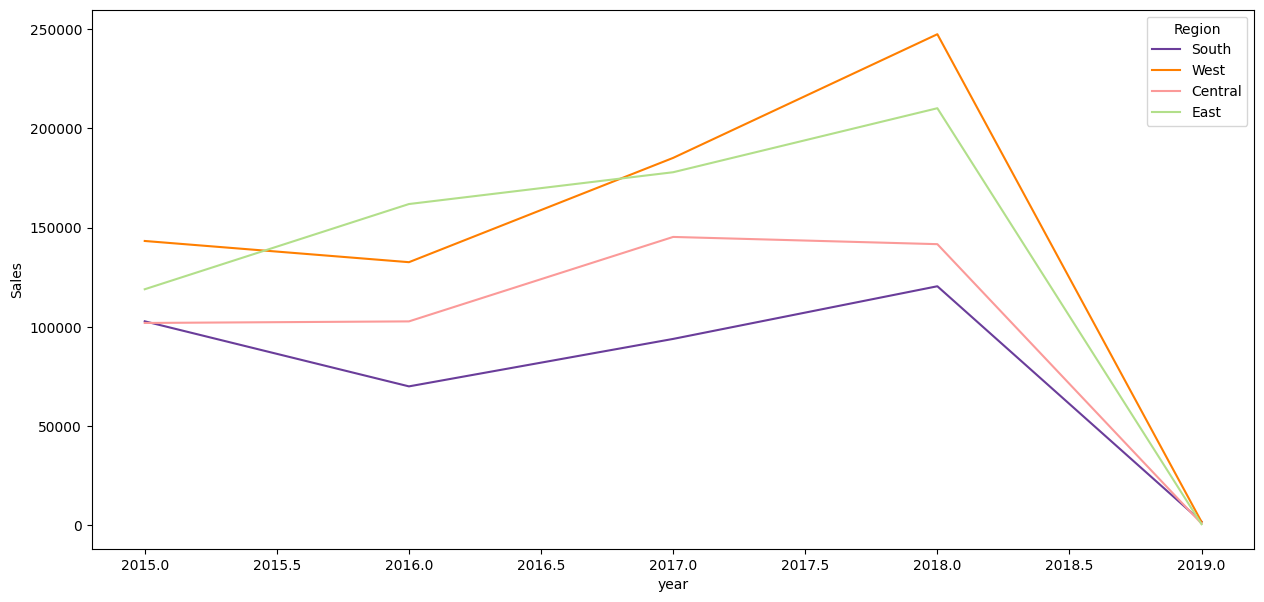

In [50]:
plt.figure(figsize = (15,7))
ax = sns.lineplot(x = df['year'], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette='Paired_r')
for i in ax.containers :
 plt.bar_label(i);


<ipython-input-51-68586cda367b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = df['year'], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette='Paired_r')


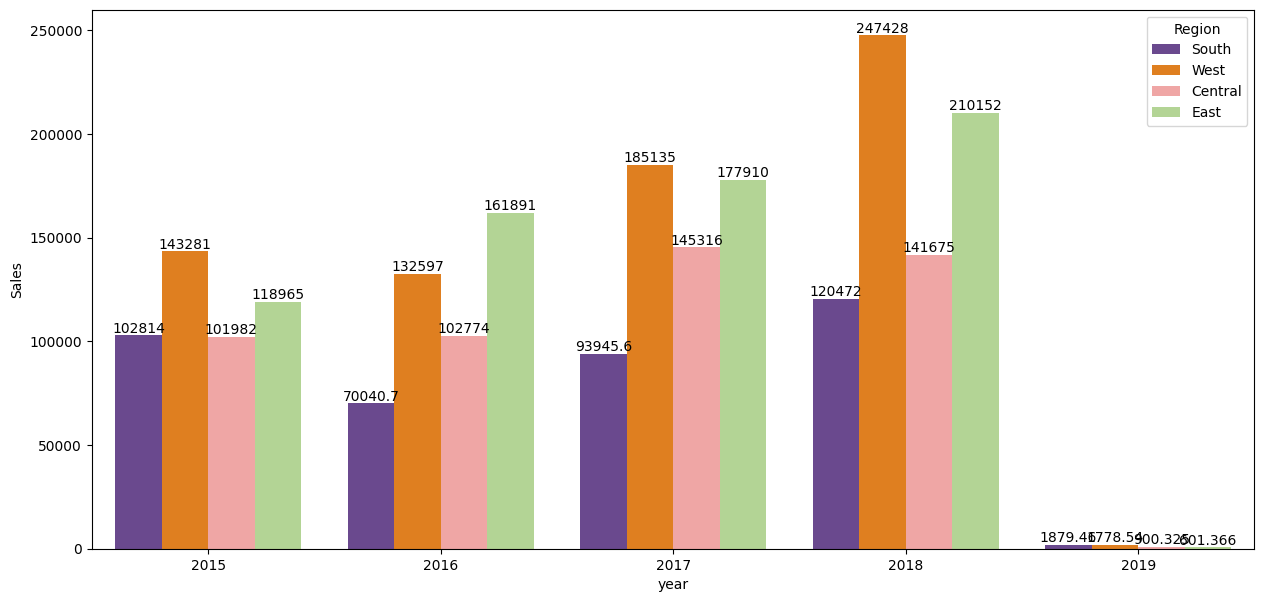

In [51]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = df['year'], y = df["Sales"], hue = df["Region"], ci = None, estimator=np.sum,palette='Paired_r')
for i in ax.containers :
 plt.bar_label(i);


<ipython-input-52-5d364cadb9d8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = df['year'], y = df["Sales"], hue = df["Category"], ci = None, estimator=np.sum,palette='Paired_r')


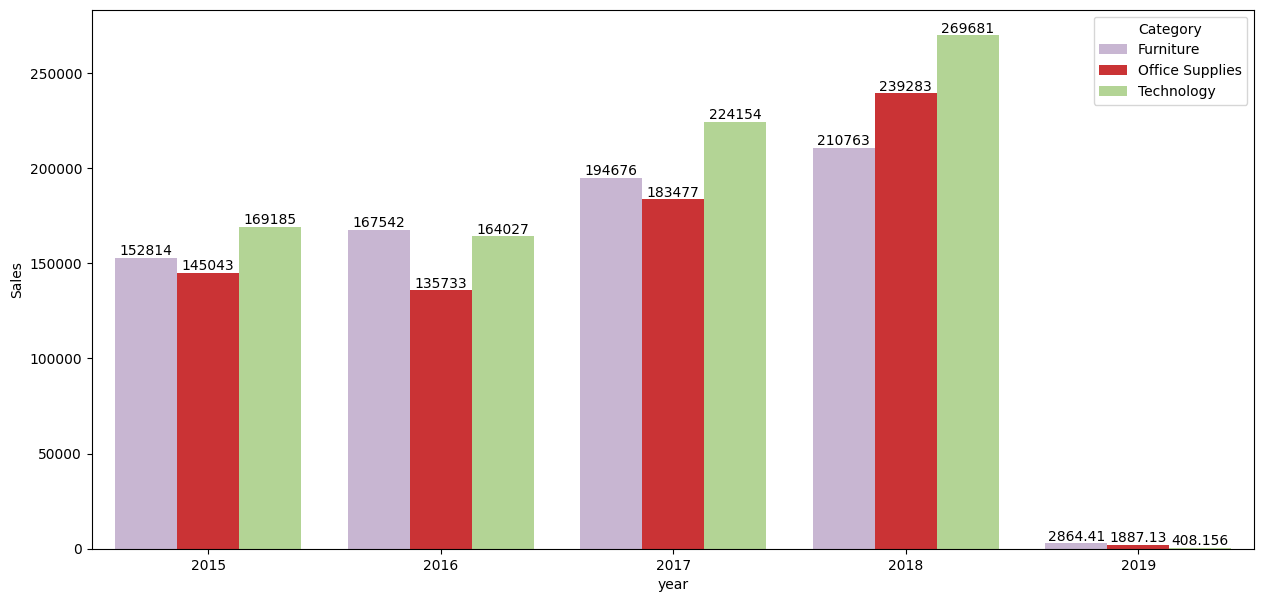

In [52]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = df['year'], y = df["Sales"], hue = df["Category"], ci = None, estimator=np.sum,palette='Paired_r')
for i in ax.containers :
 plt.bar_label(i);


In [53]:
year_sales1 = df.groupby(['year','City']).sum().sort_values('Sales',ascending=True).head(5)
year_sales1.reset_index(inplace=True)
year_sales1


<ipython-input-53-c56ded77e0c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales1 = df.groupby(['year','City']).sum().sort_values('Sales',ascending=True).head(5)


,year,City,Row ID,Postal Code,Sales,Year,Month,day,month
0,2018,Abilene,6990,79605.0,1.392,2018,12,13,12
1,2018,Elyria,8716,44035.0,1.824,2018,11,20,11
2,2018,Jupiter,5441,33458.0,2.064,2018,11,18,11
3,2017,Cuyahoga Falls,8047,44221.0,2.214,2017,12,17,12
4,2017,Pensacola,4879,32503.0,2.214,2017,7,31,7


#Results:

1- The NewYork city is the best-selling city 2- Califorinia is the best-selling state 3-Standard class is the most common in ordering and selling in ship mode 4-Consumer is the most commonly
ordered and sold in the segment 5-office suppliers are the most ordered although Technology is the most selling 6-Technolgy is the best seller in 2015,2017,2018 but in 2016 The Furniture is the
best selling with (164K) compared to technology which was (162k) in the same year. 7- In Sub-categories binders are the most ordered product. 8-As a consequence of technology category is the
best seller so, phones are the best sellers in sub-categories and chairs are the second degree in best selling list. 9-West is the best-selling in regions with 31.40% 10-the relation between Segment,
a category with sales revealed that consumer is the major in buying Technology. 11- The relation between category and region with sales revealed that: a- Technology the most selling in the east
then west. b-office suppliers are the most in the west and east. c-Furniture is the most selling in the west and then east. ***Although the difference in regions with categories didn't impact on sales.
12-In 2019 is the least in sales.
